# Airbnb NYC Data Analysis - Final Project
## Client: Airbnb Hosts in New York City
### Tools: Python, Pandas, Matplotlib, Seaborn
#### Zachary Kruse
This project uses the Inside Airbnb NYC dataset to help Airbnb hosts understand market trends and improve their listings. We explore four main business questions through data cleaning, analysis, and visualizations.

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the cleaned dataset
df = pd.read_csv("cleaned_airbnb_nyc.csv")



# Drop rows with missing price or room_type
df = df.dropna(subset=['price', 'room_type'])

# Fill missing values in reviews_per_month with 0
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)

# Confirm cleaning
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21986 entries, 0 to 21985
Data columns (total 78 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            21986 non-null  float64
 1   listing_url                                   21986 non-null  object 
 2   scrape_id                                     21986 non-null  float64
 3   last_scraped                                  21986 non-null  object 
 4   source                                        21986 non-null  object 
 5   name                                          21986 non-null  object 
 6   description                                   21586 non-null  object 
 7   neighborhood_overview                         12079 non-null  object 
 8   picture_url                                   21986 non-null  object 
 9   host_id                                       21986 non-null 

 Question 1: What factors influence the price of Airbnb listings in NYC?

price                   1.000000
accommodates            0.457856
beds                    0.355295
bedrooms                0.308588
review_scores_rating    0.055602
Name: price, dtype: float64


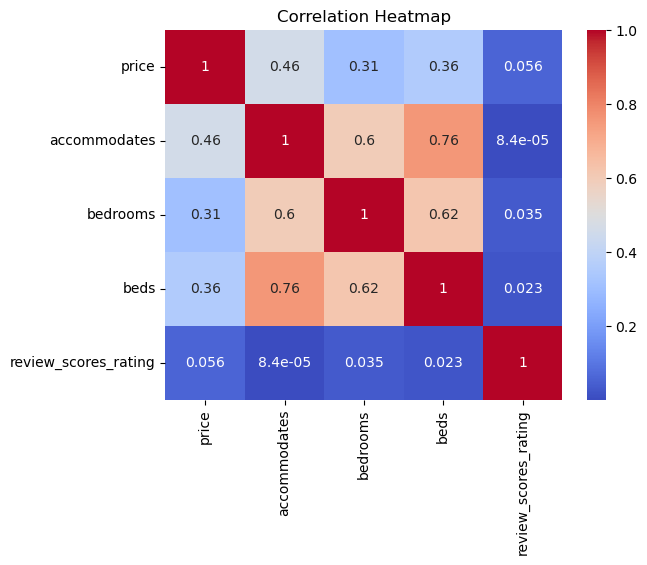

In [8]:
# Check correlation with price
correlation = df[['price', 'accommodates', 'bedrooms', 'beds', 'review_scores_rating']].corr()
print(correlation['price'].sort_values(ascending=False))

# Visualize correlation
sns.heatmap(correlation, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


Insight:
The number of accommodations, bedrooms, and beds are positively correlated with price. Ratings have weak correlation, implying other qualitative factors may be at play.

Question 2: Which neighborhoods have the highest and lowest average prices?

neighbourhood_group_cleansed
Manhattan        234.331590
Brooklyn         157.112836
Queens           121.772501
Staten Island    118.073482
Bronx            109.114286
Name: price, dtype: float64


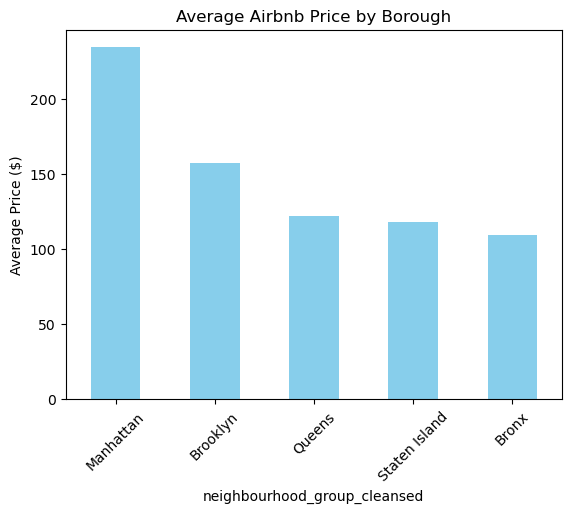

In [9]:
# Average price by neighborhood group
avg_price_neighborhood = df.groupby('neighbourhood_group_cleansed')['price'].mean().sort_values(ascending=False)
print(avg_price_neighborhood)

# Plot
avg_price_neighborhood.plot(kind='bar', color='skyblue')
plt.ylabel("Average Price ($)")
plt.title("Average Airbnb Price by Borough")
plt.xticks(rotation=45)
plt.show()


Insight:
Manhattan has the highest average listing prices, followed by Brooklyn. The Bronx has the lowest.

Question 3: How does room type affect price and availability?

                      price  availability_365
room_type                                    
Entire home/apt  231.045261        242.865102
Hotel room       422.559767        267.405248
Private room     111.551535        233.231469
Shared room      111.488095        267.357143


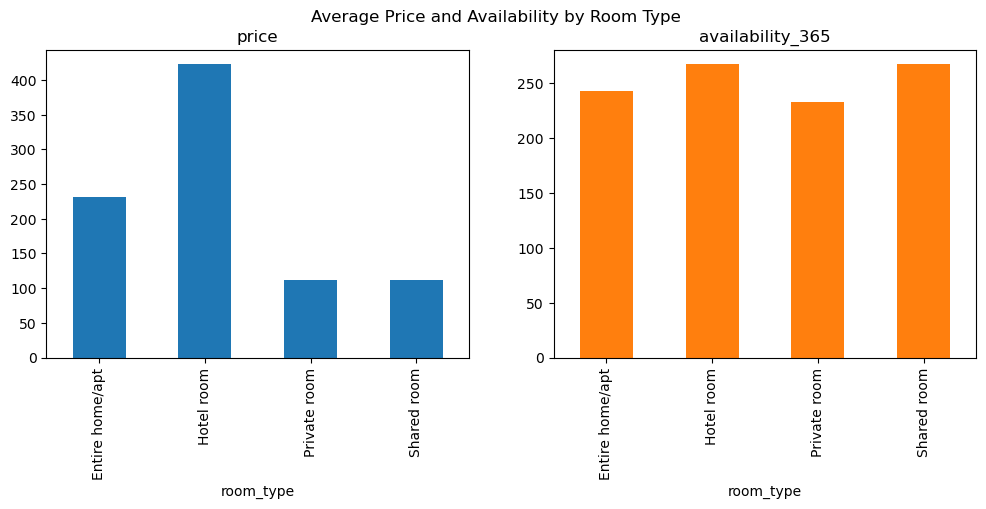

In [10]:
# Price and availability by room type
room_summary = df.groupby('room_type')[['price', 'availability_365']].mean()
print(room_summary)

# Plot
room_summary.plot(kind='bar', subplots=True, layout=(1, 2), figsize=(12, 4), legend=False)
plt.suptitle("Average Price and Availability by Room Type")
plt.show()


Insight:
Hotel rooms are most expensive and moderately available. Shared rooms are cheaper and more widely available.



Question 4: What’s the relationship between the number of reviews and a listing’s popularity?

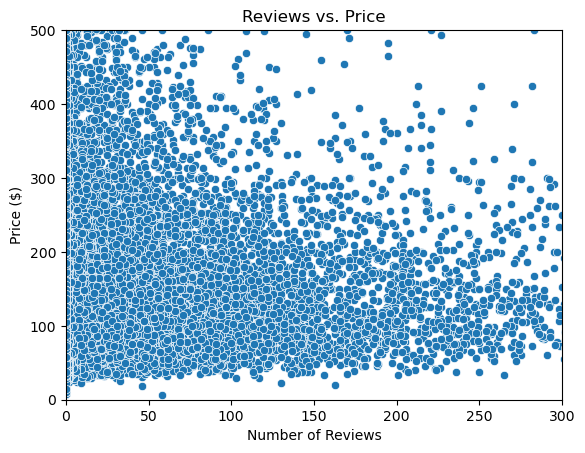

In [11]:
# Scatter plot of reviews vs. price
sns.scatterplot(data=df, x='number_of_reviews', y='price')
plt.title("Reviews vs. Price")
plt.xlabel("Number of Reviews")
plt.ylabel("Price ($)")
plt.xlim(0, 300)
plt.ylim(0, 500)
plt.show()


Insight:
Most listings with high review counts are lower-priced. Popular listings tend to be budget-friendly, suggesting high turnover and value appeal.



## Summary of Findings
Manhattan listings are the priciest, while The Bronx is most affordable.

Room size (entire vs. shared) greatly affects price.

More reviews usually means cheaper, more popular listings.

Hosts can optimize pricing based on borough, room type, and market saturation.